<a href="https://colab.research.google.com/github/Fameless4ellL/GoogleCollabML/blob/main/Keras_w62868.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#innstall required software
!pip install tensorflow numpy

In [ ]:
#install live loss plot
#it will plot graphs in real time
!pip install livelossplot

In [ ]:
from livelossplot import PlotLossesKeras
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from random import randint
import time


In [ ]:
# tensorflow
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
#keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


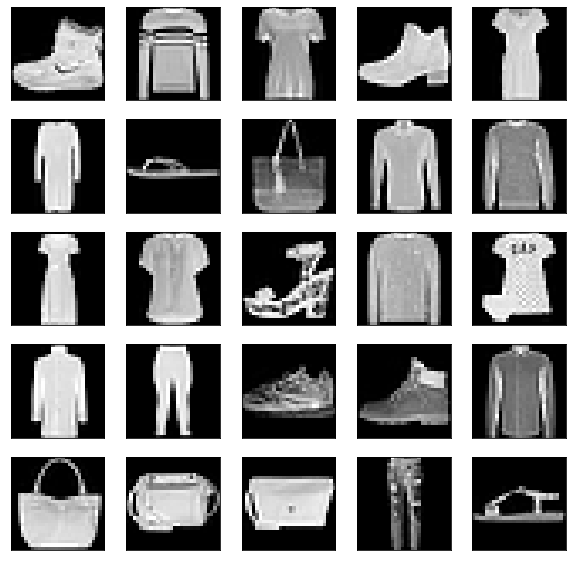

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

# Normalize the images.
train_images = train_images / 255
test_images = test_images / 255

plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i*5], cmap=plt.cm.binary_r)

In [ ]:

#train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
#test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_images.shape)
print(test_images.shape) 

(60000, 784)
(10000, 784)


# Build Model

In [ ]:
 
 model = Sequential([ 
  Dense(100, activation='relu', input_shape=(784,)),
	Dense(100, activation='relu'),
	Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


# Compile model

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
# Compile the model.
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#  Train model

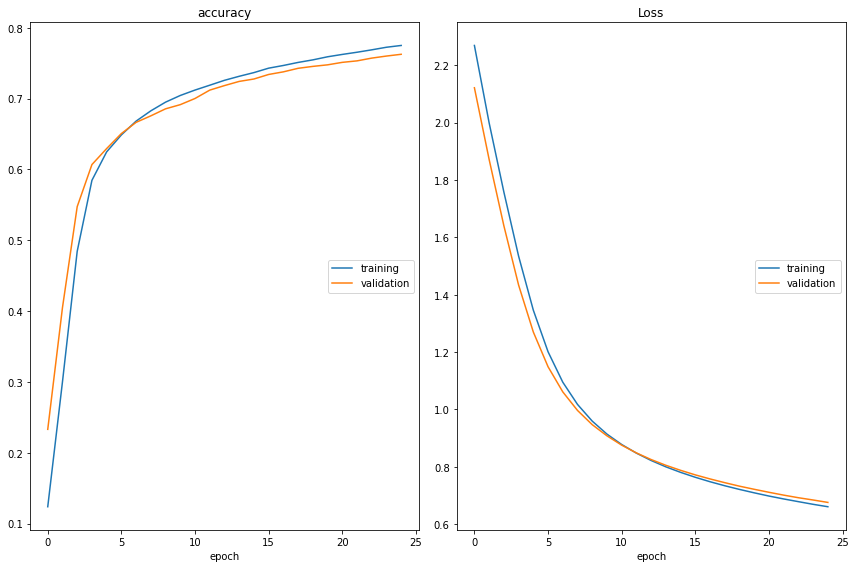

accuracy
	training         	 (min:    0.124, max:    0.775, cur:    0.775)
	validation       	 (min:    0.233, max:    0.763, cur:    0.763)
Loss
	training         	 (min:    0.661, max:    2.269, cur:    0.661)
	validation       	 (min:    0.676, max:    2.122, cur:    0.676)
###
###
###
--- 34 seconds ---


In [ ]:
# TRAINING THE MODEL

# code to use liveplot
plotlosses = PlotLossesKeras()

# we will measure the time required to make training
start_time = time.time()

#stop = EarlyStopping(monitor='val_loss', patience=5)

model.fit(train_images, train_labels, 
          epochs=25, 
          validation_data=(test_images, test_labels), 
          batch_size=2048, 
          callbacks=[plotlosses], 
          verbose=False
          )


# The training time was:
print("###")
print("###")
print("###")
print("--- %d seconds ---" % (time.time() - start_time))


# Evaluate accuracy 

In [ ]:
model.evaluate(
  test_images,
  test_labels
)

313/313 [==============================] - 0s 1ms/step - loss: 0.6761 - accuracy: 0.7626


[0.6761066913604736, 0.7626000046730042]